<a href="https://colab.research.google.com/github/Maneeshkumar08/My-project-/blob/main/Breast_Cancer_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
zip_path = '/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'
extract_path = '/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'

In [13]:
import zipfile, os

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted contents to: {extract_path}")
else:
    print("Dataset already extracted.")

Dataset already extracted.


In [14]:
import os

for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:
        print(f"{subindent}{f}")
    if level > 2:
        break

breast/
    README.txt
    count_files.sh
    benign/
        README_B.txt
        adenosis.stat.txt
        fibroadenoma.stat.txt
        phyllodes_tumor.stat.txt
        process_db_stat.py
        SOB/
            adenosis/


In [15]:
import os

for root, dirs, files in os.walk(extract_path):

    level = root.replace(extract_path, "").count(os.sep)
    if level > 2:
        break
    print("    " * level + os.path.basename(root) + "/")

    for file in files[:5]:
        print("    " * (level + 1) + file)


breast/
    README.txt
    count_files.sh
    benign/
        README_B.txt
        adenosis.stat.txt
        fibroadenoma.stat.txt
        phyllodes_tumor.stat.txt
        process_db_stat.py
        SOB/


In [17]:
dataset_dir = '/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'
print("Checking dataset structure...")
for f in os.listdir(dataset_dir):
    print(f)

Checking dataset structure...
benign
README.txt
count_files.sh
malignant


In [18]:
import pathlib

all_images = list(pathlib.Path(dataset_dir).rglob('*.png'))
print(f"\n Total image files found: {len(all_images)}")

print("\nSample image paths:")
for img in all_images[:5]:
    print(img)



 Total image files found: 2962

Sample image paths:
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-006.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-008.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-009.png


In [19]:
import pandas as pd

records = []
for path in all_images:
    parts = path.parts
    label = 'benign' if 'benign' in parts else 'malignant'
    subtype = parts[-5]
    magnification = parts[-2]
    records.append((str(path), label, subtype, magnification))

df = pd.DataFrame(records, columns=['path', 'label', 'subtype', 'magnification'])
print("\nDataFrame created successfully!")
print(df.head())


DataFrame created successfully!
                                                path   label subtype  \
0  /content/drive/MyDrive/test/BreaKHis_v1/BreaKH...  benign     SOB   
1  /content/drive/MyDrive/test/BreaKHis_v1/BreaKH...  benign     SOB   
2  /content/drive/MyDrive/test/BreaKHis_v1/BreaKH...  benign     SOB   
3  /content/drive/MyDrive/test/BreaKHis_v1/BreaKH...  benign     SOB   
4  /content/drive/MyDrive/test/BreaKHis_v1/BreaKH...  benign     SOB   

  magnification  
0          100X  
1          100X  
2          100X  
3          100X  
4          100X  


In [20]:
print("\n Summary Information:")
print("Total images:", len(df))
print("\nClass distribution:")
print(df['label'].value_counts())
print("\nSubtype distribution:")
print(df['subtype'].value_counts())
print("\nMagnification distribution:")
print(df['magnification'].value_counts())


 Summary Information:
Total images: 2962

Class distribution:
label
benign       2480
malignant     482
Name: count, dtype: int64

Subtype distribution:
subtype
SOB    2962
Name: count, dtype: int64

Magnification distribution:
magnification
100X    796
200X    739
40X     734
400X    693
Name: count, dtype: int64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

print("\n Basic dataset overview:")
print(df.describe(include='all'))
print("\nUnique magnifications:", df['magnification'].unique())


 Basic dataset overview:
                                                     path   label subtype  \
count                                                2962    2962    2962   
unique                                               2962       2       1   
top     /content/drive/MyDrive/test/BreaKHis_v1/BreaKH...  benign     SOB   
freq                                                    1    2480    2962   

       magnification  
count           2962  
unique             4  
top             100X  
freq             796  

Unique magnifications: ['100X' '200X' '400X' '40X']


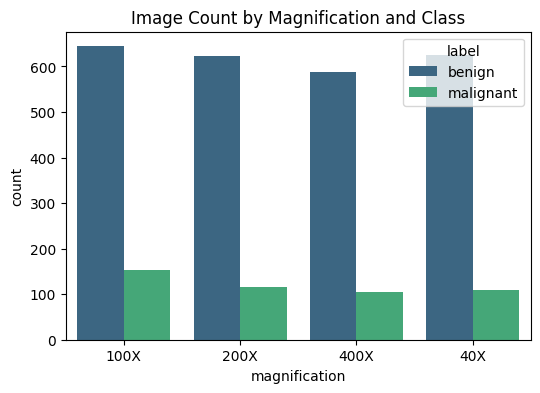

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='magnification', data=df, hue='label', palette='viridis')
plt.title('Image Count by Magnification and Class')
plt.show()

/tmp/ipython-input-4031147241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


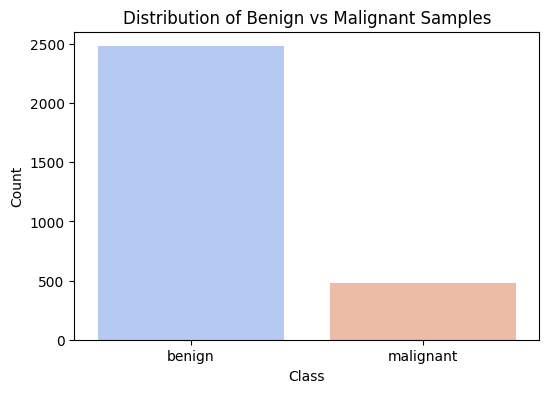

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title('Distribution of Benign vs Malignant Samples')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


 Benign examples:


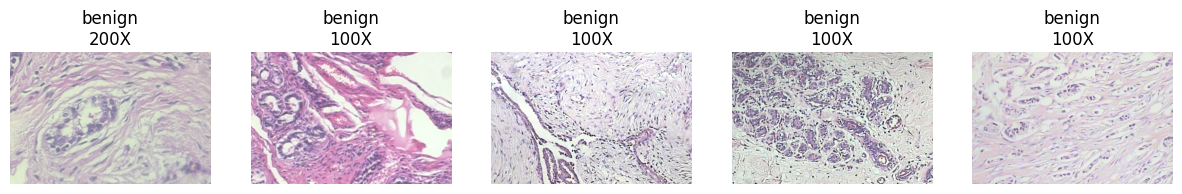


 Malignant examples:


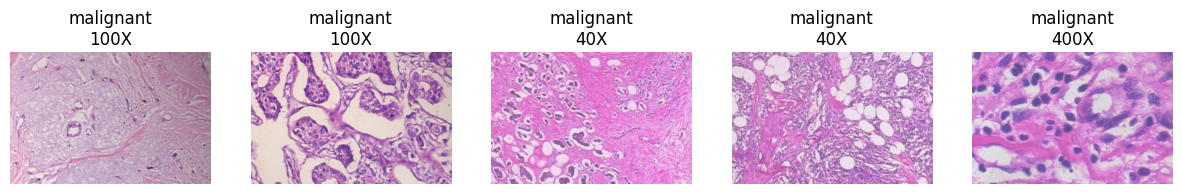

In [24]:
import random
from matplotlib.image import imread

def show_random_images(df, label, n=5):
    subset = df[df['label'] == label].sample(n)
    plt.figure(figsize=(15,3))
    for i, (_, row) in enumerate(subset.iterrows()):
        img = imread(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{label}\n{row['magnification']}")
    plt.show()

print("\n Benign examples:")
show_random_images(df, 'benign', 5)

print("\n Malignant examples:")
show_random_images(df, 'malignant', 5)


 Average Benign Tissue:


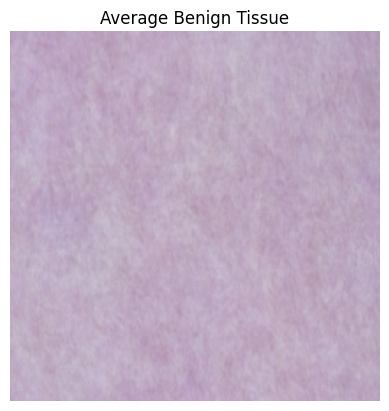


 Average Malignant Tissue:


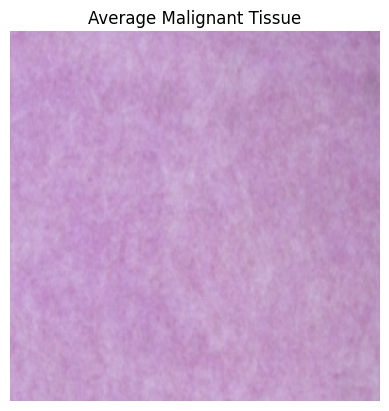

In [25]:
import numpy as np

def compute_average_image(df_subset, title):
    imgs = []
    for img_path in random.sample(df_subset['path'].tolist(), 30):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (256,256))
            imgs.append(img.astype(np.float32) / 255.0)
    avg_img = np.mean(imgs, axis=0)
    plt.imshow(avg_img)
    plt.title(title)
    plt.axis('off')
    plt.show()

print("\n Average Benign Tissue:")
compute_average_image(df[df['label']=='benign'], 'Average Benign Tissue')

print("\n Average Malignant Tissue:")
compute_average_image(df[df['label']=='malignant'], 'Average Malignant Tissue')

In [26]:
#load libraries and split data
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

train_df, temp_df = train_test_split(df, test_size=0.30, stratify=df['label'], random_state=SEED)
val_df, test_df  = train_test_split(temp_df, test_size=0.50, stratify=temp_df['label'], random_state=SEED)

print("Split sizes:", len(train_df), len(val_df), len(test_df))
print("Train distribution:\n", train_df['label'].value_counts())
print("Val distribution:\n", val_df['label'].value_counts())
print("Test distribution:\n", test_df['label'].value_counts())

Split sizes: 2073 444 445
Train distribution:
 label
benign       1736
malignant     337
Name: count, dtype: int64
Val distribution:
 label
benign       372
malignant     72
Name: count, dtype: int64
Test distribution:
 label
benign       372
malignant     73
Name: count, dtype: int64


In [27]:
#to set basic parameters and convert labels for model training
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE
NUM_CLASSES = df['label'].nunique()

label_to_index = {'benign':0, 'malignant':1}
index_to_label = {v:k for k,v in label_to_index.items()}

In [28]:
#take orginal image and return processed image tensor with path&labels
def process_path(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    return img, label

In [29]:
# converts pandas dataframe in tensorflow dataframe with paths
def df_to_dataset(dataframe, shuffle=True, augment=False):
    paths = dataframe['path'].values
    labels = np.array([label_to_index[l] for l in dataframe['label'].values], dtype=np.int32)
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(paths), seed=SEED)
    ds = ds.map(lambda p, l: process_path(p, l), num_parallel_calls=AUTOTUNE)
    if augment:
        ds = ds.map(lambda x, y: (data_augment(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

In [30]:
#data augmentation pipeline which randomly flips,rotates, zooms and shifts.
data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.15),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.05, 0.05)
], name='data_augmentation')

In [31]:
#creates a tensorflow dataset for train,test and val.
train_ds = df_to_dataset(train_df, shuffle=True, augment=True)
val_ds   = df_to_dataset(val_df, shuffle=False, augment=False)
test_ds  = df_to_dataset(test_df, shuffle=False, augment=False)

In [32]:
#used for class imbalance calculate class weights and balance to ensure model treats equally
y_train = train_df['label'].map(label_to_index).values
cw = class_weight.compute_class_weight(class_weight='balanced',
                                      classes=np.unique(y_train),
                                      y=y_train)
class_weights = {i: float(w) for i, w in enumerate(cw)}
print("Class weights:", class_weights)


Class weights: {0: 0.5970622119815668, 1: 3.0756676557863503}


In [33]:
#it build and compiles Efficient NetBO for image classification
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,797 (16.07 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [34]:
# define callbacks that helps in control and improve training
checkpoint_path = '/content/drive/MyDrive/breakhis_effnet_checkpoint.h5'
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]